## Angelos Dema
## Sheet 03                                      
### H.2 
#### a)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, eigh

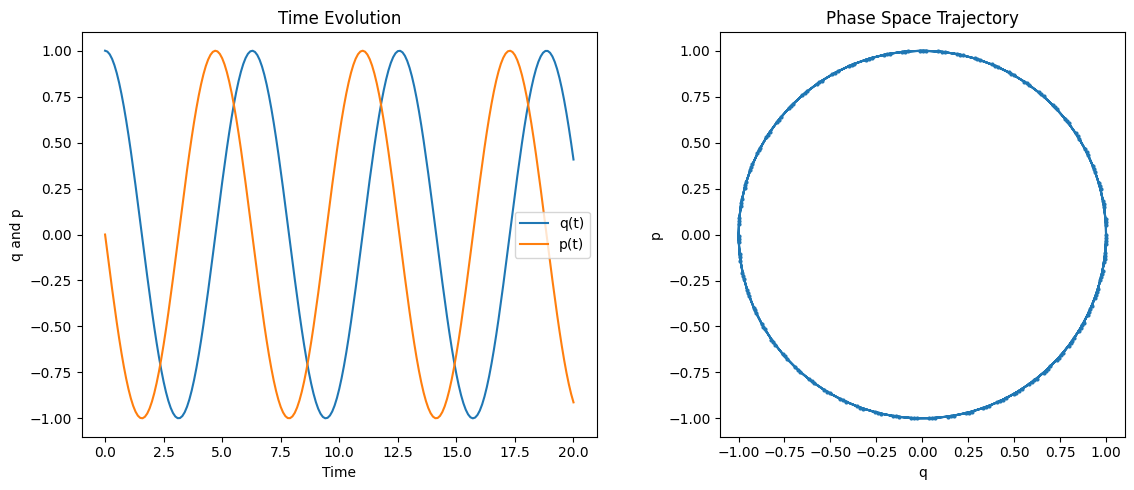

In [33]:

def rk_step(state, dt, a, b):
    """
    Perform one Runge-Kutta step.
    Returns:
      New state (q_new, p_new) after one time step.
    """
    s = len(b)
    # Initialize a list to hold the stage derivatives as tuples (kq, kp)
    k = [None] * s
    q, p = state

    # Evaluate each stage. For explicit methods, summations run for j in 0,..., i-1.
    for i in range(s):
        q_stage = q
        p_stage = p
        for j in range(i):
            # Accumulate contributions from previous stages.
            q_stage += dt * a[i][j] * k[j][0]
            p_stage += dt * a[i][j] * k[j][1]
        # For our harmonic oscillator: dq/dt = p and dp/dt = -q.
        k[i] = (p_stage, -q_stage)
    
    # Combine the stage values to form the next state.
    q_new = q + dt * sum(b[i] * k[i][0] for i in range(s))
    p_new = p + dt * sum(b[i] * k[i][1] for i in range(s))
    
    return (q_new, p_new)

def integrate_rk(initial_state, dt, steps, a, b):
    """
    Integrate the system for a given number of time steps using a Runge-Kutta method.
    Returns:
      Numpy array of states, each row is [q, p].
    """
    states = [initial_state]
    state = initial_state
    for _ in range(steps):
        state = rk_step(state, dt, a, b)
        states.append(state)
    return np.array(states)

# Classical Fourth-Order Runge-Kutta (RK4) Coefficients -- Example

a_rk4 = [
    [0,    0,   0,  0],
    [0.5,  0,   0,  0],
    [0,   0.5,  0,  0],
    [0,    0,   1,  0]
]
b_rk4 = [1/6, 1/3, 1/3, 1/6]

# --- Running a Simulation of the Harmonic Oscillator ---
if __name__ == '__main__':
    dt = 0.1           # time step
    steps = 200        # number of steps to simulate
    initial_state = (1.0, 0.0)  # initial conditions: q0 = 1, p0 = 0

    # Integrate using RK4
    states = integrate_rk(initial_state, dt, steps, a_rk4, b_rk4)
    q_vals = states[:,0]
    p_vals = states[:,1]
    t = np.arange(0, (steps+1)*dt, dt)

    # Plot the evolution in time and the phase space trajectory.
    plt.figure(figsize=(12, 5))
    
    # Time evolution of q and p
    plt.subplot(1, 2, 1)
    plt.plot(t, q_vals, label="q(t)")
    plt.plot(t, p_vals, label="p(t)")
    plt.xlabel("Time")
    plt.ylabel("q and p")
    plt.title("Time Evolution")
    plt.legend()
    
    # Phase space trajectory
    plt.subplot(1, 2, 2)
    plt.plot(q_vals, p_vals, '-o', markersize=2)
    plt.xlabel("q")
    plt.ylabel("p")
    plt.title("Phase Space Trajectory")
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.tight_layout()
    plt.show()


#### b)

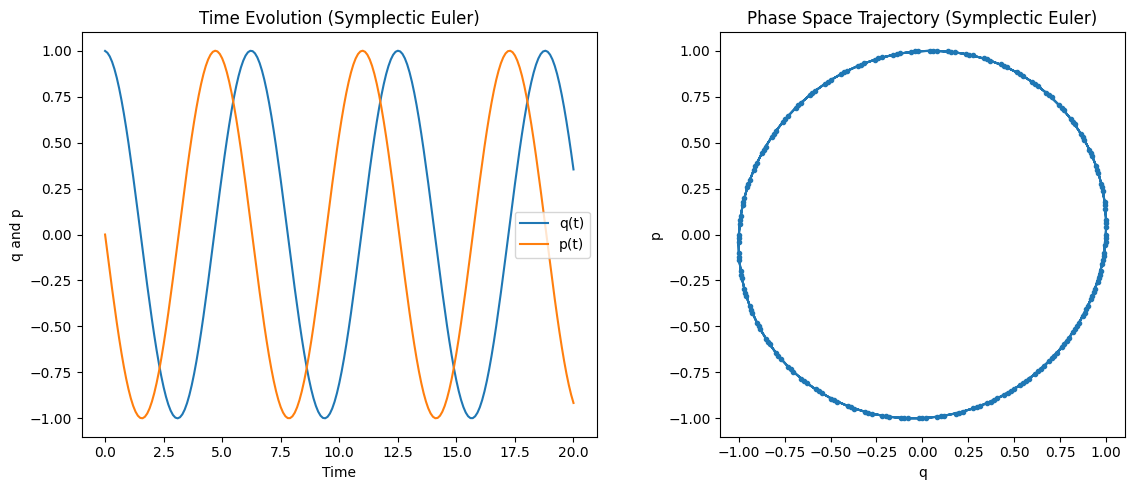

In [34]:
def symplectic_euler_step(q, p, dt):
    """
    Perform one symplectic Euler step for the harmonic oscillator.
    Returns:
      (q_next, p_next) : tuple of floats
          Updated position and momentum.
    """
    p_next = p - dt * q  # Update momentum using the force, F = -q.
    q_next = q + dt * p_next  # Update position with the new momentum.
    return q_next, p_next

def integrate_symplectic(initial_q, initial_p, dt, steps):
    """
    Integrate the harmonic oscillator using the symplectic Euler method.
    Returns:
      q_values, p_values : np.arrays
          The arrays of positions and momenta at each time step.
    """
    # Initialize arrays to record positions and momenta.
    q_values = [initial_q]
    p_values = [initial_p]
    
    q, p = initial_q, initial_p
    for _ in range(steps):
        q, p = symplectic_euler_step(q, p, dt)
        q_values.append(q)
        p_values.append(p)
    
    return np.array(q_values), np.array(p_values)

# Parameters for the simulation.
dt = 0.1           # Time step.
steps = 200        # Total number of time steps.
initial_q = 1.0    # Initial position.
initial_p = 0.0    # Initial momentum.

# Perform the integration.
q_vals, p_vals = integrate_symplectic(initial_q, initial_p, dt, steps)
time = np.arange(0, (steps+1)*dt, dt)

# Plot the results.

plt.figure(figsize=(12, 5))

# Plot time evolution of q and p.
plt.subplot(1, 2, 1)
plt.plot(time, q_vals, label="q(t)")
plt.plot(time, p_vals, label="p(t)")
plt.xlabel("Time")
plt.ylabel("q and p")
plt.title("Time Evolution (Symplectic Euler)")
plt.legend()

# Plot the phase space trajectory.
plt.subplot(1, 2, 2)
plt.plot(q_vals, p_vals, '-o', markersize=3)
plt.xlabel("q")
plt.ylabel("p")
plt.title("Phase Space Trajectory (Symplectic Euler)")
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


#### c)

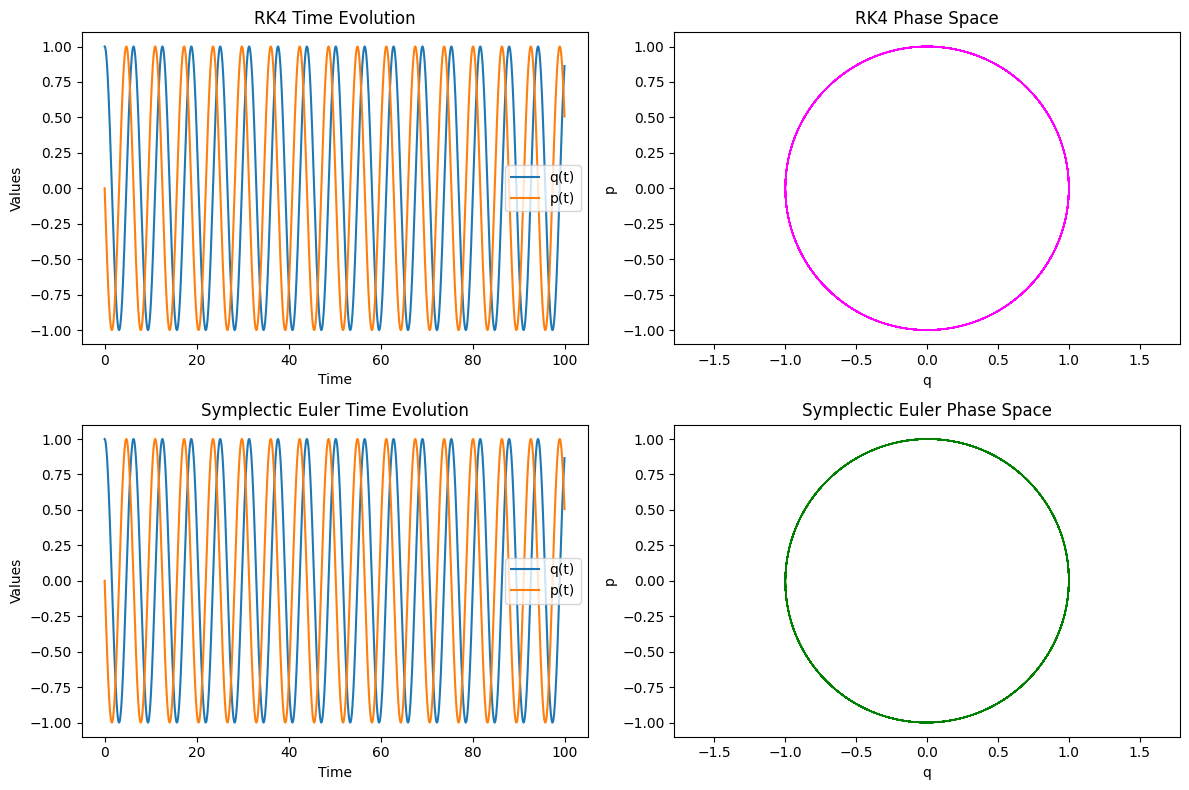

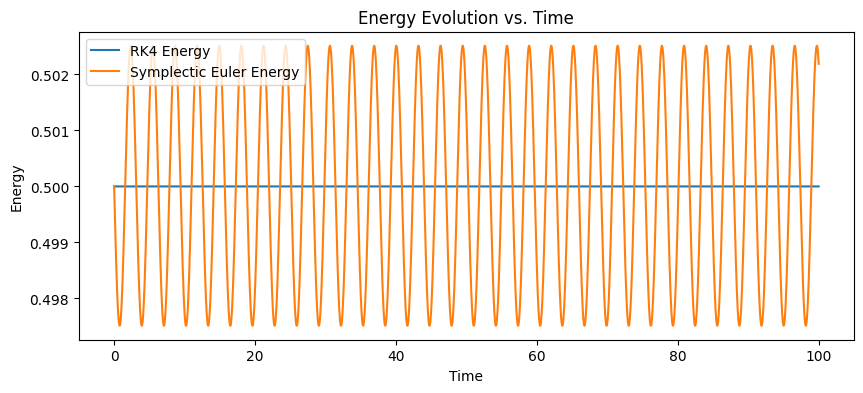

In [35]:

def rk4_step(q, p, dt):
    """
    Perform a single RK4 step for the harmonic oscillator.
    Equations of motion:
      dq/dt = p
      dp/dt = -q
    """
    # Define derivative functions.
    def f(q, p): 
        return p      # dq/dt
    def g(q, p): 
        return -q     # dp/dt
    
    # First stage
    k1_q = f(q, p)
    k1_p = g(q, p)
    
    # Second stage
    q1 = q + 0.5 * dt * k1_q
    p1 = p + 0.5 * dt * k1_p
    k2_q = f(q1, p1)
    k2_p = g(q1, p1)
    
    # Third stage
    q2 = q + 0.5 * dt * k2_q
    p2 = p + 0.5 * dt * k2_p
    k3_q = f(q2, p2)
    k3_p = g(q2, p2)
    
    # Fourth stage
    q3 = q + dt * k3_q
    p3 = p + dt * k3_p
    k4_q = f(q3, p3)
    k4_p = g(q3, p3)
    
    # Combine increments
    q_new = q + (dt/6.0) * (k1_q + 2*k2_q + 2*k3_q + k4_q)
    p_new = p + (dt/6.0) * (k1_p + 2*k2_p + 2*k3_p + k4_p)
    
    return q_new, p_new


# General Integrator 
def integrate(method, q0, p0, dt, steps):
    """
    Integrate the system using the provided stepping method.
    Returns:
      qs, ps  : numpy arrays of the positions and momenta.
    """
    qs = [q0]
    ps = [p0]
    q, p = q0, p0
    for _ in range(steps):
        q, p = method(q, p, dt)
        qs.append(q)
        ps.append(p)
    return np.array(qs), np.array(ps)

#----------------------------------
q0, p0 = 1.0, 0.0   # Initial conditions.
dt = 0.01          # Small time step.
steps = 10000      # Total number of steps; total time T = steps * dt = 100.

# Integrate using both methods.
q_rk, p_rk = integrate(rk4_step, q0, p0, dt, steps)
q_symp, p_symp = integrate(symplectic_euler_step, q0, p0, dt, steps)

# Time array for plotting.
t = np.linspace(0, steps*dt, steps+1)

# Compute the energy E = 1/2*(q^2 + p^2) for both methods.
E_rk = 0.5 * (q_rk**2 + p_rk**2)
E_symp = 0.5 * (q_symp**2 + p_symp**2)


plt.figure(figsize=(12, 8))

# RK4: Time evolution of q and p.
plt.subplot(2, 2, 1)
plt.plot(t, q_rk, label="q(t)")
plt.plot(t, p_rk, label="p(t)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("RK4 Time Evolution")
plt.legend()

# RK4: Phase space trajectory.
plt.subplot(2, 2, 2)
plt.plot(q_rk, p_rk, color='magenta', lw=1)
plt.xlabel("q")
plt.ylabel("p")
plt.title("RK4 Phase Space")
plt.axis('equal')

# Symplectic Euler: Time evolution of q and p.
plt.subplot(2, 2, 3)
plt.plot(t, q_symp, label="q(t)")
plt.plot(t, p_symp, label="p(t)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Symplectic Euler Time Evolution")
plt.legend()

# Symplectic Euler: Phase space trajectory.
plt.subplot(2, 2, 4)
plt.plot(q_symp, p_symp, color='green', lw=1)
plt.xlabel("q")
plt.ylabel("p")
plt.title("Symplectic Euler Phase Space")
plt.axis('equal')

plt.tight_layout()
plt.show()

# Plot the energy evolution for both methods.
plt.figure(figsize=(10, 4))
plt.plot(t, E_rk, label="RK4 Energy")
plt.plot(t, E_symp, label="Symplectic Euler Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Evolution vs. Time")
plt.legend()
plt.show()


#### d)

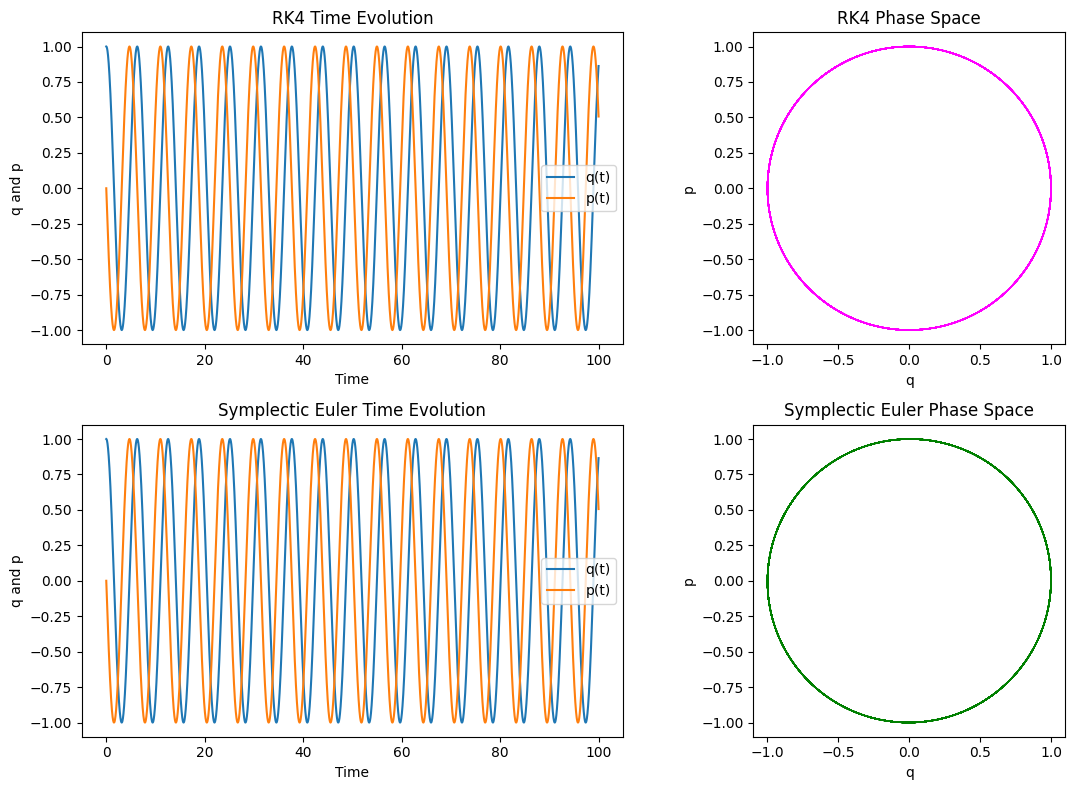

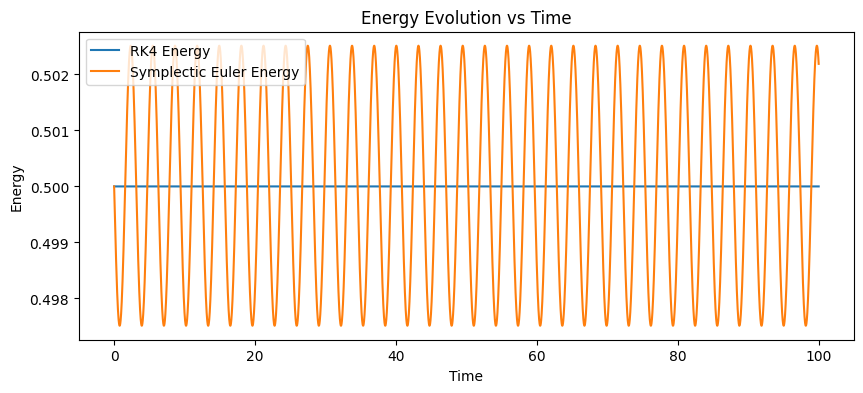

In [36]:

q0, p0 = 1.0, 0.0   # Initial conditions.
dt = 0.01          # Small time step.
steps = 10000      # Total number of steps (Total time T = steps*dt = 100).

# Integrate using RK4 and Symplectic Euler
q_rk, p_rk = integrate(rk4_step, q0, p0, dt, steps)
q_symp, p_symp = integrate(symplectic_euler_step, q0, p0, dt, steps)

# Time array for plotting.
t = np.linspace(0, steps*dt, steps+1)


# Calculate Energies         

E_rk = 0.5 * (q_rk**2 + p_rk**2)
E_symp = 0.5 * (q_symp**2 + p_symp**2)


plt.figure(figsize=(12, 8))

# RK4 Time Evolution: q(t) and p(t)
plt.subplot(2, 2, 1)
plt.plot(t, q_rk, label="q(t)")
plt.plot(t, p_rk, label="p(t)")
plt.xlabel("Time")
plt.ylabel("q and p")
plt.title("RK4 Time Evolution")
plt.legend()

# RK4 Phase Space Trajectory
plt.subplot(2, 2, 2)
plt.plot(q_rk, p_rk, color='magenta', lw=1)
plt.xlabel("q")
plt.ylabel("p")
plt.title("RK4 Phase Space")
plt.gca().set_aspect('equal', adjustable='box')

# Symplectic Euler Time Evolution: q(t) and p(t)
plt.subplot(2, 2, 3)
plt.plot(t, q_symp, label="q(t)")
plt.plot(t, p_symp, label="p(t)")
plt.xlabel("Time")
plt.ylabel("q and p")
plt.title("Symplectic Euler Time Evolution")
plt.legend()

# Symplectic Euler Phase Space Trajectory
plt.subplot(2, 2, 4)
plt.plot(q_symp, p_symp, color='green', lw=1)
plt.xlabel("q")
plt.ylabel("p")
plt.title("Symplectic Euler Phase Space")
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Plot the Energy Evolution for both methods.
plt.figure(figsize=(10, 4))
plt.plot(t, E_rk, label="RK4 Energy")
plt.plot(t, E_symp, label="Symplectic Euler Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Evolution vs Time")
plt.legend()
plt.show()


#### e)

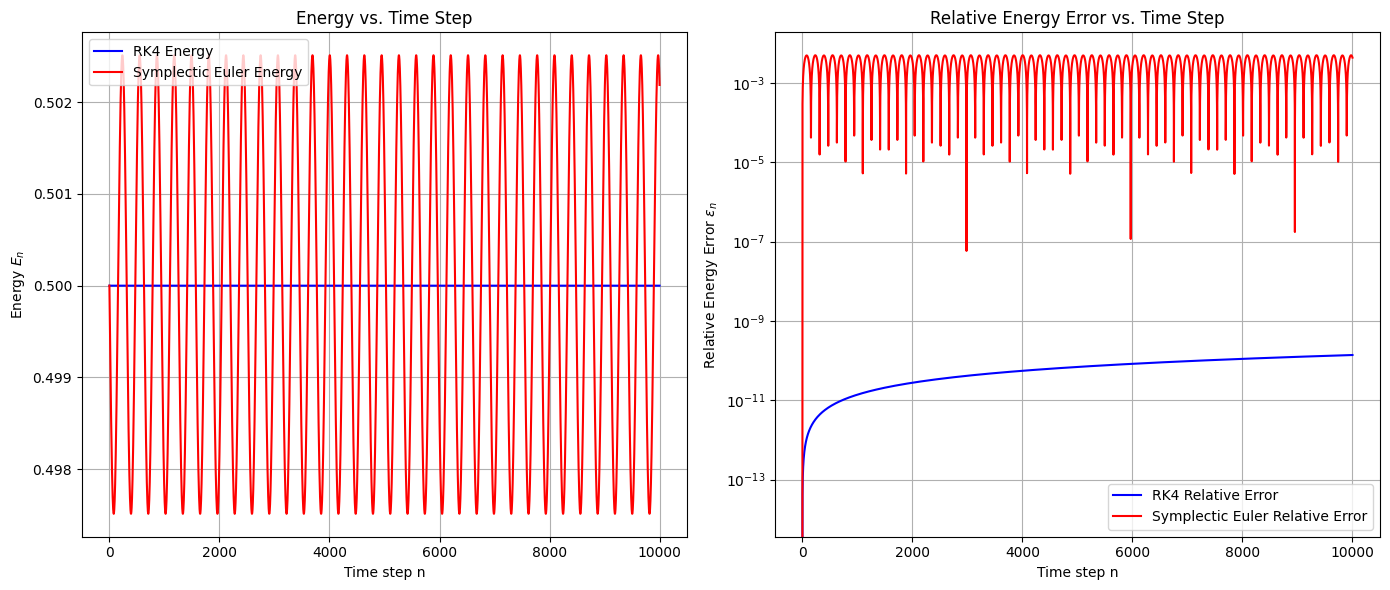

In [37]:

# Simulation parameters
q0, p0 = 1.0, 0.0   # Initial conditions.
dt = 0.01          # Small time step.
n_steps = 10000    # Total number of steps (Total time T = n_steps * dt = 100).

# Integrate using RK4 and Symplectic Euler methods.
q_rk, p_rk = integrate(rk4_step, q0, p0, dt, n_steps)
q_symp, p_symp = integrate(symplectic_euler_step, q0, p0, dt, n_steps)

# --------------------------------------
# Energy Calculations
# --------------------------------------
# Energy at each time step: E_n = 0.5*(q_n^2 + p_n^2)
E_rk = 0.5 * (q_rk**2 + p_rk**2)
E_symp = 0.5 * (q_symp**2 + p_symp**2)

# Initial energy
E0 = 0.5 * (q0**2 + p0**2)

# Relative energy error: ε_n = |E_n - E0| / E0
err_rk = np.abs(E_rk - E0) / E0
err_symp = np.abs(E_symp - E0) / E0

# Step index array (n)
n_array = np.arange(n_steps + 1)

# --------------------------------------
# Plotting Energy versus Time Step n
# --------------------------------------
plt.figure(figsize=(14, 6))

# Energy as a function of time step n.
plt.subplot(1, 2, 1)
plt.plot(n_array, E_rk, label="RK4 Energy", color='blue', lw=1.5)
plt.plot(n_array, E_symp, label="Symplectic Euler Energy", color='red', lw=1.5)
plt.xlabel("Time step n")
plt.ylabel("Energy $E_n$")
plt.title("Energy vs. Time Step")
plt.legend()
plt.grid(True)

# Relative energy error versus time step n (semilog scale).
plt.subplot(1, 2, 2)
plt.semilogy(n_array, err_rk, label="RK4 Relative Error", color='blue', lw=1.5)
plt.semilogy(n_array, err_symp, label="Symplectic Euler Relative Error", color='red', lw=1.5)
plt.xlabel("Time step n")
plt.ylabel("Relative Energy Error $\\epsilon_n$")
plt.title("Relative Energy Error vs. Time Step")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### f)

- The symplectic Euler method keeps the energy oscillating around the true value with no drift, while the RK method's energy slowly drifts away from the correct value over time.

## H3
#### c)

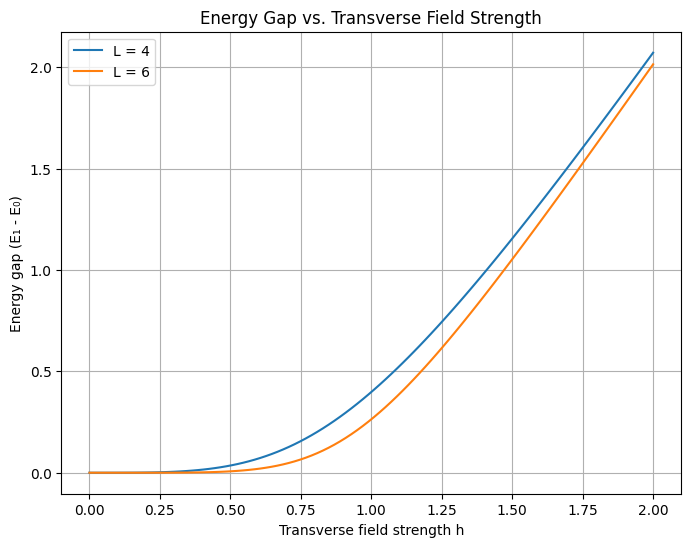

In [38]:

# Define Pauli matrices and the identity.
sx = np.array([[0, 1],
               [1, 0]])
sz = np.array([[1, 0],
               [0, -1]])
I = np.eye(2)

def kron_n(operators):
    """Compute the Kronecker product of a list of operators."""
    result = operators[0]
    for op in operators[1:]:
        result = np.kron(result, op)
    return result

def build_hamiltonian(L, J, h):
    """
    Build the Hamiltonian for the 1D transverse field Ising model with L spins.
    """
    dim = 2**L
    H_int = np.zeros((dim, dim), dtype=complex)
    H_field = np.zeros((dim, dim), dtype=complex)
    
    # Interaction term: -J ∑ σz_i σz_{i+1}
    for i in range(L):
        op_list = []
        for j in range(L):
            # Put sigma_z on sites i and (i+1) (with periodic BCs)
            if j == i or j == (i+1) % L:
                op_list.append(sz)
            else:
                op_list.append(I)
        H_int += -J * kron_n(op_list)
    
    # Field term: -h ∑ σx_i
    for i in range(L):
        op_list = []
        for j in range(L):
            if j == i:
                op_list.append(sx)
            else:
                op_list.append(I)
        H_field += - h * kron_n(op_list)
    
    return H_int + H_field

# Parameters for the simulation.
J = 1.0
hf = 2.0
n_steps = 100  # number of h values
h_vals = np.linspace(0, hf, n_steps)
L_values = [4, 6]

# Dictionary to store the energy gaps for each L.
gaps = {}

for L in L_values:
    gap_list = []
    for h in h_vals:
        H = build_hamiltonian(L, J, h)
        # Use eigvalsh since the Hamiltonian is Hermitian.
        eigvals = np.linalg.eigvalsh(H)
        eigvals = np.sort(eigvals.real)
        gap = eigvals[1] - eigvals[0]
        gap_list.append(gap)
    gaps[L] = np.array(gap_list)

# Plot the energy gap vs. transverse field strength h for L=4 and L=6.
plt.figure(figsize=(8, 6))
for L in L_values:
    plt.plot(h_vals, gaps[L], label=f"L = {L}")
plt.xlabel("Transverse field strength h")
plt.ylabel("Energy gap (E₁ - E₀)")
plt.title("Energy Gap vs. Transverse Field Strength")
plt.legend()
plt.grid(True)
plt.show()


#### d)

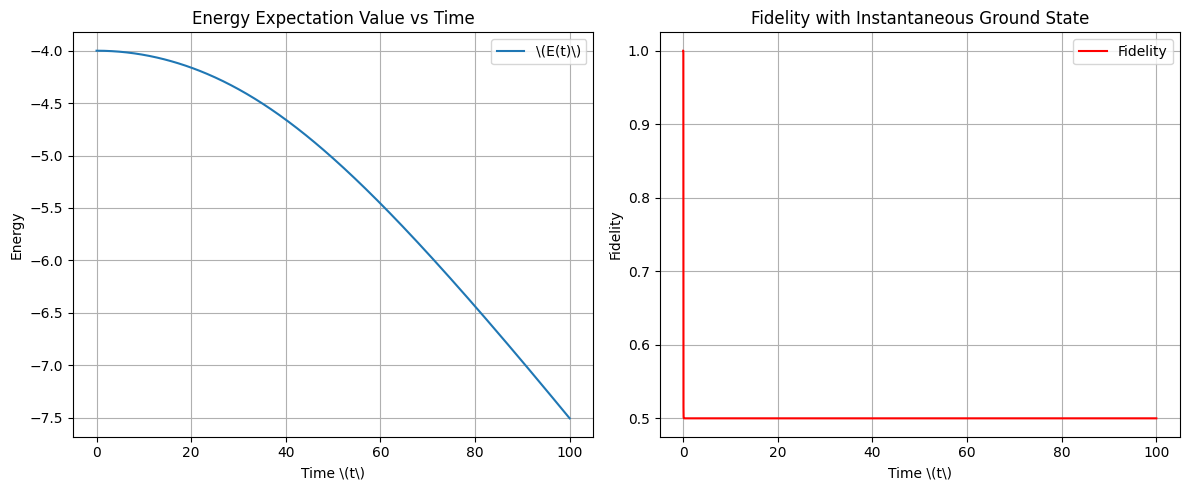

In [39]:
def build_H(L, J, h_eff):
    """
    Construct the Hamiltonian for the 1D TFIM for L spins with 
    transverse field strength h_eff.
    """
    dim = 2**L
    H_int = np.zeros((dim, dim), dtype=complex)
    H_field = np.zeros((dim, dim), dtype=complex)
    
    # Interaction term: -J ∑ σ_z^(i) σ_z^(i+1)
    for i in range(L):
        op_list = []
        for j in range(L):
            # Place sigma_z at site i and its neighbour (mod L)
            if j == i or j == (i+1)%L:
                op_list.append(sz)
            else:
                op_list.append(I)
        H_int += -J * kron_n(op_list)
    
    # Field term: -h_eff ∑ σ_x^(i)
    for i in range(L):
        op_list = []
        for j in range(L):
            if j == i:
                op_list.append(sx)
            else:
                op_list.append(I)
        H_field += -h_eff * kron_n(op_list)
        
    return H_int + H_field

# ---------------------- Simulation parameters ---------------------- #
L = 4
J = 1.0
hf = 2.0
T_total = 100.0      # Total evolution time (choose sufficiently large for adiabaticity)
dt = 0.01            # Time step
n_steps = int(T_total/dt)
t_vals = np.linspace(0, T_total, n_steps+1)

# ------------------ Initial State (ground state of H(0)) ------------------ #
# Build H(0) (with h_eff=0)
H0 = build_H(L, J, 0.0)
# Diagonalize H(0) to get the ground state.
eigvals0, eigvecs0 = eigh(H0)
psi = eigvecs0[:, 0]  # ground state of H(0)

# Arrays to store observables.
energy_expectation = np.zeros(n_steps+1)
energy_expectation[0] = np.vdot(psi, H0 @ psi).real

# Optionally, track the fidelity with the instantaneous ground state.
fidelity = np.zeros(n_steps+1)
fidelity[0] = 1.0  # at t=0, psi is the ground state of H(0)

states = [psi.copy()]

# --------------- Time Evolution ----------------- #
# We propagate the state with: psi(t+dt) = exp(-i H(t) dt) * psi(t)
for n, t in enumerate(t_vals[:-1]):
    # Linear interpolation: field strength at time t is (t/T_total)*hf.
    h_eff = (t/T_total) * hf
    H_t = build_H(L, J, h_eff)
    
    # Time-evolution operator for the small time step dt.
    U = expm(-1j * H_t * dt)
    
    # Evolve the state.
    psi = U @ psi
    states.append(psi.copy())
    
    # Record the expectation value of the instantaneous Hamiltonian.
    energy_expectation[n+1] = np.vdot(psi, H_t @ psi).real
    
    # Optionally, compare psi with the instantaneous ground state.
    eigvals_t, eigvecs_t = eigh(H_t)
    gs_t = eigvecs_t[:, 0]  # instantaneous ground state
    fidelity[n+1] = np.abs(np.vdot(gs_t, psi))**2

# ------------------------- Plotting ------------------------- #
plt.figure(figsize=(12,5))

# Energy expectation value vs. time.
plt.subplot(1,2,1)
plt.plot(t_vals, energy_expectation, label=r'\(E(t)\)')
plt.xlabel("Time \(t\)")
plt.ylabel("Energy")
plt.title("Energy Expectation Value vs Time")
plt.legend()
plt.grid(True)

# Fidelity with the instantaneous ground state vs. time.
plt.subplot(1,2,2)
plt.plot(t_vals, fidelity, 'r', label="Fidelity")
plt.xlabel("Time \(t\)")
plt.ylabel("Fidelity")
plt.title("Fidelity with Instantaneous Ground State")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### e)

In [40]:

# Define Pauli matrices and identity.
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)
I  = np.eye(2, dtype=complex)


def build_H(L, J, h_eff):
    """
    Build the Hamiltonian for the one-dimensional TFIM with L spins.
    """
    dim = 2**L
    H_int = np.zeros((dim, dim), dtype=complex)
    H_field = np.zeros((dim, dim), dtype=complex)
    
    # Interaction term: -J ∑ σ_z^(i) σ_z^(i+1)
    for i in range(L):
        op_list = []
        for j in range(L):
            if j == i or j == (i+1) % L:
                op_list.append(sz)
            else:
                op_list.append(I)
        H_int += -J * kron_n(op_list)
    
    # Transverse field term: -h_eff ∑ σ_x^(i)
    for i in range(L):
        op_list = []
        for j in range(L):
            if j == i:
                op_list.append(sx)
            else:
                op_list.append(I)
        H_field += -h_eff * kron_n(op_list)
    
    return H_int + H_field

# Simulation parameters
L = 4
J = 1.0
hf = 2.0
T_total = 100.0      # Total evolution time
dt = 0.01            # Time step
n_steps = int(T_total/dt)
t_vals = np.linspace(0, T_total, n_steps+1)

# ---------------------------------------------------------
# Obtain initial state: ground

#### f)

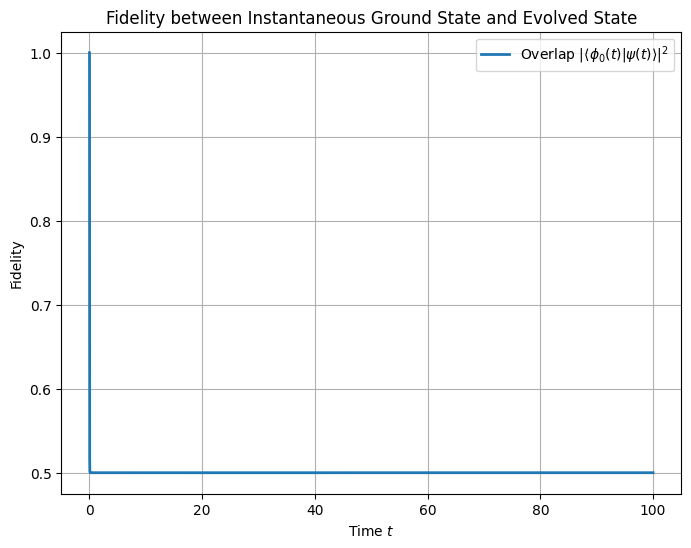

In [41]:
# ---------------------- Simulation parameters ---------------------- #
L = 4                   # Number of spins
J = 1.0                 # Coupling constant
hf = 2.0                # Final transverse field strength
T_total = 100.0         # Total evolution time.
dt = 0.01               # Time step.
n_steps = int(T_total/dt)
t_vals = np.linspace(0, T_total, n_steps+1)

# ---------------------- Initial state ---------------------- #
# H(0) has only the interaction term (h_eff = 0).
H0 = build_H(L, J, 0.0)
eigvals0, eigvecs0 = eigh(H0)
psi = eigvecs0[:, 0]  # Ground state of H(0).

# ---------------------- Time evolution and fidelity ---------------------- #
fidelity = np.zeros(n_steps+1)
# At t = 0, the state is the ground state: fidelity = 1.
fidelity[0] = 1.0

for n, t in enumerate(t_vals[:-1]):
    # Determine the effective transverse field at time t
    h_eff = (t / T_total) * hf
    H_t = build_H(L, J, h_eff)
    
    # Calculate the instantaneous ground state of H(t)
    eigvals, eigvecs = eigh(H_t)
    gs_t = eigvecs[:, 0]  # Ground state of H(t)
    
    # Compute fidelity = |<gs_t | psi>|^2
    fidelity[n] = np.abs(np.vdot(gs_t, psi))**2
    
    # Propagate the state: |psi(t+dt)> = exp(-i H(t) dt) |psi(t)>
    U = expm(-1j * H_t * dt)
    psi = U @ psi

# Final time step: update fidelity at T_total.
h_eff = (t_vals[-1] / T_total) * hf
H_final = build_H(L, J, h_eff)
eigvals, eigvecs = eigh(H_final)
gs_final = eigvecs[:, 0]
fidelity[-1] = np.abs(np.vdot(gs_final, psi))**2

# ---------------------- Plotting the overlap ---------------------- #
plt.figure(figsize=(8, 6))
plt.plot(t_vals, fidelity, label=r'Overlap $|\langle \phi_0(t)|\psi(t)\rangle|^2$', lw=2)
plt.xlabel("Time $t$")
plt.ylabel("Fidelity")
plt.title("Fidelity between Instantaneous Ground State and Evolved State")
plt.legend()
plt.grid(True)
plt.show()


#### g)

- At the critical point \( h_c = J \), the energy gap between the ground and excited states becomes very small (or even closes in the infinite-size limit). This means that the system becomes extremely sensitive to changes in the Hamiltonian. In practice, you must change the Hamiltonian exceptionally slowly to keep the evolution adiabatic. Otherwise, it's very easy for the system to jump into excited states, breaking the adiabatic evolution.

## H4)
#### d)

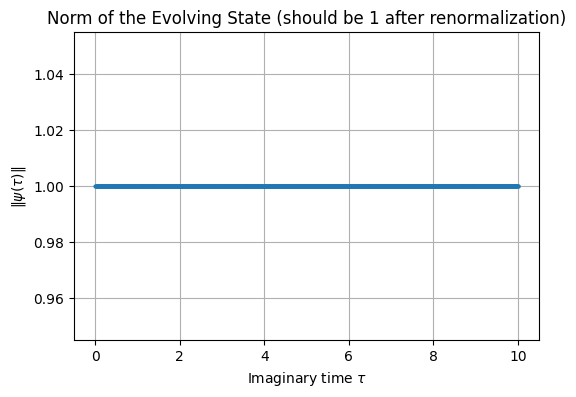

Final state norm = 0.9999999999999998


In [42]:
# ----------------------- Parameters ----------------------- #
L = 4              # Number of spins.
J = 1.0            # Coupling constant.
h = 1.0            # Transverse field strength.
tau_max = 10.0     # Maximum imaginary time.
dtau = 0.01        # Imaginary time step.
n_steps = int(tau_max/dtau)

# Build the Hamiltonian (we assume h is constant for this evolution)
H = build_H(L, J, h)

# --------------------- Initial State ---------------------- #
# Generate a random complex state vector of dimension 2^L.
dim = 2**L
psi0 = np.random.randn(dim) + 1j * np.random.randn(dim)
psi0 /= np.linalg.norm(psi0)  # Normalize

# ----------------- Imaginary Time Evolution ----------------- #
# We'll store the fidelity (or simple norm check) if desired.
taus = np.linspace(0, tau_max, n_steps+1)
psi = psi0.copy()  # starting state
norms = [np.linalg.norm(psi)]
psi_list = [psi.copy()]

for step in range(n_steps):
    # Propagator: U = exp(-H * dtau)
    U = expm(-H * dtau)
    psi = U @ psi
    
    # Periodically renormalize to avoid underflow.
    psi = psi / np.linalg.norm(psi)
    
    psi_list.append(psi.copy())
    norms.append(np.linalg.norm(psi))

# --------------------- Plot Results --------------------- #
plt.figure(figsize=(6,4))
plt.plot(taus, norms, 'o-', markersize=2)
plt.xlabel(r'Imaginary time $\tau$')
plt.ylabel(r'$\|\psi(\tau)\|$')
plt.title('Norm of the Evolving State (should be 1 after renormalization)')
plt.grid(True)
plt.show()

# Optionally: print the final state norm and final state.
print("Final state norm =", np.linalg.norm(psi))


#### e)

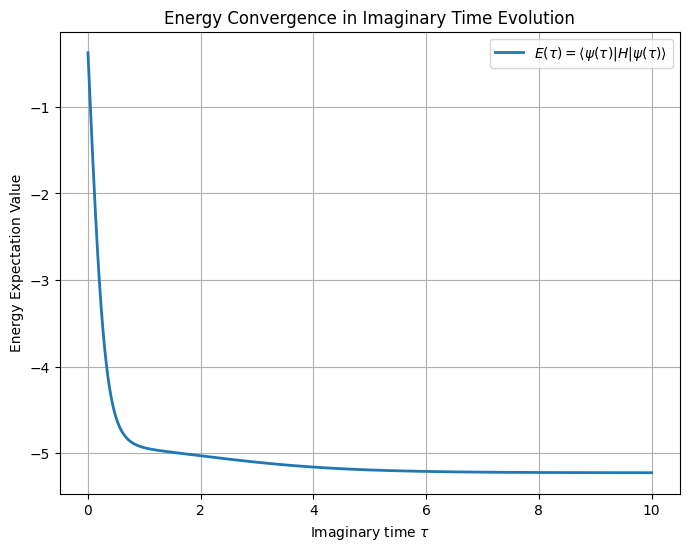

In [43]:
# ----------------------- Simulation Parameters ----------------------- #
L = 4              # Number of spins.
J = 1.0            # Coupling constant.
h = 1.0            # Transverse field strength.
tau_max = 10.0     # Total imaginary time.
dtau = 0.01        # Imaginary time step.
n_steps = int(tau_max / dtau)
taus = np.linspace(0, tau_max, n_steps+1)

# Build the Hamiltonian for the chosen h. (Here h is kept constant during the evolution.)
H = build_H(L, J, h)

# ---------------------- Initial State ---------------------- #
# Create a random complex state, then normalize.
dim = 2**L
psi0 = np.random.randn(dim) + 1j * np.random.randn(dim)
psi0 /= np.linalg.norm(psi0)

# ---------------- Imaginary Time Evolution ---------------- #
# We will store the energy expectation values at each τ.
E_list = []   # List to store E(τ)
psi = psi0.copy()

# Compute energy at τ = 0.
E0 = np.vdot(psi, H @ psi).real
E_list.append(E0)

# Evolve the state in imaginary time and compute the energy at each step.
for step in range(n_steps):
    # Propagator for a small time step: U = exp(-H dτ)
    U = expm(-H * dtau)
    psi = U @ psi
    # Renormalize to avoid the norm shrinking to zero.
    psi /= np.linalg.norm(psi)
    # Compute energy expectation value: E(τ) = <psi|H|psi>
    E_current = np.vdot(psi, H @ psi).real
    E_list.append(E_current)

# --------------------------- Plotting --------------------------- #
plt.figure(figsize=(8, 6))
plt.plot(taus, E_list, label=r'$E(\tau) = \langle \psi(\tau)|H|\psi(\tau)\rangle$', lw=2)
plt.xlabel(r'Imaginary time $\tau$')
plt.ylabel('Energy Expectation Value')
plt.title('Energy Convergence in Imaginary Time Evolution')
plt.legend()
plt.grid(True)
plt.show()


#### f)

In [44]:
# ----------------------- Parameters ----------------------- #
L = 4              # Number of spins.
J = 1.0            # Coupling constant.
h = 1.0            # Transverse field strength for the simulation.
tau_max = 10.0     # Maximum imaginary time.
dtau = 0.01        # Imaginary time step.
n_steps = int(tau_max/dtau)

# Build the Hamiltonian (constant h during evolution).
H = build_H(L, J, h)

# --------------------- Initial State --------------------- #
dim = 2**L
psi = np.random.randn(dim) + 1j*np.random.randn(dim)
psi /= np.linalg.norm(psi)  # Normalize the initial state

# ---------------- Imaginary Time Evolution ---------------- #
for step in range(n_steps):
    U = expm(-H * dtau)   # Propagator: exp(-H * dtau)
    psi = U @ psi         # Evolve the state
    psi /= np.linalg.norm(psi)  # Renormalize after each step

# At this point, psi is the final state after imaginary time evolution.
psi_final = psi.copy()

# ---------------- Direct Diagonalization ---------------- #
eigvals, eigvecs = eigh(H)
# Ground state from direct diagonalization is the eigenvector with the smallest eigenvalue.
phi0 = eigvecs[:, 0]

# ------------------- Overlap Calculation ------------------- #
overlap = np.abs(np.vdot(phi0, psi_final))**2
print("Overlap between final state and directly computed ground state:", overlap)


Overlap between final state and directly computed ground state: 0.9998671023381739


#### g)

- Imaginary Time Evolution: This method filters out the excited states quickly because their contributions decay exponentially. Even with a random starting state, you don't have to wait very long for the state to become almost entirely the ground state.
   
- Real-Time Adiabatic Evolution: Here, you change the Hamiltonian very slowly to keep the system in the ground state. This is especially hard near critical points where the energy gap is small—making the process much slower and less efficient.